# Importation des librairies :

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.integrate as integrate
import scipy.stats as ss
import matplotlib.pyplot as plt

from numpy import math
from scipy.stats import fisher_exact
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


pd.set_option('display.max_columns', None)

# Importer le dataset :


In [ ]:
data = pd.read_csv("/content/sample_data/baseRQF.csv")

Renvoie le nombre d'éléments dans notre data

In [ ]:
len(data)

3006

Afficher des détails statistiques de base comme le centile, la moyenne, la norme, etc. 

*   count - Le nombre de valeurs non vides.

*   mean - La valeur moyenne (moyenne).
*   std - L'écart type.



*   max - la valeur maximale.



*   min - la valeur minimale.

*   25 % - Le centile 25 %*.


*   50 % - Le centile 50 %*.
*   75 % - Le centile 75 %*

In [ ]:
data.describe()

,record,status,Q0QC,Q0QCA,Q0QCB,Q0QCC,Q0QCD,Q0QCE,Q0QCF,Q0QCG,REGIO,NOMX,vlist,qtime,vdecLang,vos,vbrowser,vbrowserr15oe,vmobiledevice,vmobileos,vdropout,source,list,test,IDCAM,Stest,INT01,TARGET,QLANG,Q1,Q2,Q3,Q4r1,Q4r2,Q4r3,Q4r4,Q4r5,Q4r9,Q5r1,Q5r2,Q5r3,Q5r4,Q5r5,Q5r96,Q5r99,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25A,Q25B,Q25C,Q25D,Q26A,Q26B,Q26C,Q26D,Q26E,Q26F,Q26G,Q26H,Q27,Q28,Q29,Q30r1,Q30r2,Q30r3,Q31,Q32,Q33r1,Q33r2,Q33r3,Q34,Q35,Q36r1,Q36r2,Q36r3,Q36r4,Q36r5,Q36r96,Q36r98,Q36r99,Q37,Q38,Q39,Q40,Q41A,Q41B,Q41C,Q41D,Q41E,Q41F,Q41G,Q41H,Q41I,Q41J,Q41K,Q41L,noanswerQ41M_r97,Q42,Q43,Q44,Q45A,Q45B,Q45C,Q45D,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,conditionsproche_aidant,conditionscontinue_travail,conditionsavec_enfant,sim,target
count,3006.000000,3006.0,3006.000000,173.000000,178.000000,537.000000,272.000000,158.000000,214.000000,59.000000,3006.000000,3006.000000,3006.0,3006.000000,3006.0,3006.000000,3006.000000,0.0,3006.000000,3006.000000,0.0,0.0,3006.0,0.0,3006.0,3006.0,3006.0,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000,2819.000000,2248.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.00000,2293.000000,602.000000,61.000000,3006.000000,3006.000000,988.000000,2224.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,1614.000000,3006.000000,988.000000,988.000000,988.000000,822.000000,1469.000000,1469.000000,1469.000000,1469.000000,959.000000,2067.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.0,602.000000,170.000000,170.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000,0.0,3006.000000
mean,2965.632402,3.0,9.363939,34.445087,40.387640,38.983240,10.132353,58.778481,3.682243,1.983051,1.862275,11.006653,1.0,976.471296,1.0,10.791417,10.456753,NaN,2.381903,3.014305,NaN,NaN,1.0,NaN,20877.0,2.0,1.0,1.795742,1.854624,1.280772,2.666667,78.399867,0.041859,0.144023,0.240156,0.521107,0.418588,0.008868,0.807379,0.111032,0.043632,0.017027,0.023413,0.014899,0.013835,1.798510,1.242284,1.961744,4.239521,1.962741,16.678975,6.403194,4.514305,1.859614,2.372921,2.346707,2.993458,2.254688,2.766681,1.77584,2.215002,2.252492,3.344262,2.377578,2.730206,2.623482,2.912320,1.961743,1.912508,2.173320,2.113772,2.078842,2.088490,2.522954,1.763473,2.365935,1.673320,1.839529,2.691949,0.779352,0.055668,0.168016,2.065693,2.102791,0.532335,0.127297,0.347175,2.113660,2.182874,0.781176,0.527059,0.427059,0.244706,0.229412,0.065882,0.001176,0.0,1.877076,33.764706,30.541176,2.005323,1.933799,2.701929,2.395875,2.454424,2.322023,2.062542,2.759481,2.716900,3.189953,3.364604,1.980705,2.022954,0.819029,1.783100,2.489355,2.003327,1.775449,1.741184,1.851630,1.940452,3.196274,2.866267,1.566866,3.146707,1.529275,1.119428,3.867598,4.983367,0.196607,0.762808,0.937791,NaN,1.795742
std,1808.678872,0.0,5.169083,42.183619,41.555235,33.123549,25.914936,46.465743,1.760805,0.798523,0.936766,7.820913,0.0,5025.016742,0.0,3.924759,1.782133,NaN,1.860311,2.168937,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.403226,0.352538,0.772452,0.906622,37.649020,0.200302,0.351175,0.427254,0.499643,0.493415,0.093770,0.394428,0.314228,0.204312,0.129396,0.151237,0.121170,0.116825,0.760438,0.708240,2.852455,11.194477,1.491610,26.688336,20.844622,6.327682,1.238694,1.377856,0.933048,1.332717,0.832180,1.215479,1.34832,1.721566,1.526047,2.948928,0.901551,1.461906,1.120833,1.3613

Renvoie les dimensions du data (ligne, colonne)

In [ ]:
data.shape

(3006, 155)

Renvoie toutes les columnes qui existent dans notre data

In [ ]:
data.columns

Index(['record', 'uuid', 'date', 'markers', 'status', 'Q0QC', 'Q0QCA', 'Q0QCB',
       'Q0QCC', 'Q0QCD',
       ...
       'Q51', 'Q52', 'Q53', 'conditionsproche_aidant',
       'conditionscontinue_travail', 'conditionsavec_enfant', 'ipAddress',
       'LANG', 'sim', 'target'],
      dtype='object', length=155)

Pour remplacer les valeurs manquantes NaN

In [ ]:
data.replace('Missing', np.nan, inplace=True)

In [ ]:
DATA = data[['Q1', 'Q2', 'Q3', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q21', 'Q22', 'Q24', 'Q27', 'Q48', 'Q49', 'Q51', 'Q52', 'Q53']]
DATA

,Q1,Q2,Q3,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q21,Q22,Q24,Q27,Q48,Q49,Q51,Q52,Q53
0,1,2,97,1.0,1.0,1.0,2,2,3,1,4,1,4,NaN,NaN,NaN,NaN,NaN,3.0,2,1,2,3,2,3,6
1,1,2,97,2.0,1.0,1.0,5,1,6,1,2,1,1,3.0,4.0,2.0,2.0,2.0,NaN,3,1,1,3,1,2,5
2,1,3,97,2.0,1.0,1.0,5,2,1,1,5,1,4,NaN,NaN,NaN,NaN,NaN,1.0,4,3,1,3,1,2,6
3,1,4,97,1.0,1.0,1.0,1,1,10,1,6,4,2,2.0,2.0,2.0,5.0,1.0,NaN,2,1,2,3,1,5,6
4,1,2,3,2.0,1.0,1.0,5,2,13,5,5,1,1,3.0,5.0,3.0,2.0,2.0,NaN,2,2,1,3,1,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,1,4,1,2.0,1.0,1.0,2,1,10,1,4,3,2,2.0,4.0,2.0,4.0,2.0,NaN,3,2,2,3,1,3,6
3002,4,4,97,1.0,1.0,4.0,7,2,96,7,1,1,4,NaN,NaN,NaN,NaN,NaN,4.0,3,3,2,3,1,2,1
3003,4,2,97,2.0,1.0,4.0,3,2,8,1,5,4,5,NaN,NaN,NaN,NaN,NaN,NaN,2,3,1,4,2,3,6
3004,1,4,97,1.0,1.0,1.0,5,1,10,6,2,1,1,2.0,5.0,2.0,1.0,2.0,NaN,2,2,2,2,1,3,5


Détecter les valeurs manquantes dans DATA

In [ ]:
#Pour détecter les valeurs manquantes
DATA.isna().sum()

NameError: ignored

In [ ]:
DATA[DATA['Q6'].isna()]

,Q1,Q2,Q3,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q21,Q22,Q24,Q27,Q48,Q49,Q51,Q52,Q53
20,1,1,1,NaN,NaN,NaN,2,2,5,1,3,1,4,NaN,NaN,NaN,NaN,NaN,2.0,2,2,2,5,1,2,2
23,1,1,1,NaN,NaN,NaN,1,2,7,1,4,4,2,1.0,1.0,1.0,1.0,1.0,NaN,3,2,1,1,2,3,3
60,1,1,1,NaN,NaN,NaN,5,1,10,1,3,1,2,2.0,1.0,1.0,4.0,2.0,NaN,2,2,2,4,1,5,6
64,1,1,5,NaN,NaN,NaN,3,2,7,1,2,2,2,3.0,3.0,1.0,3.0,2.0,NaN,2,2,1,1,2,7,3
94,4,1,1,NaN,NaN,NaN,1,2,12,1,1,3,2,4.0,5.0,2.0,3.0,2.0,NaN,4,1,2,6,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944,4,1,2,NaN,NaN,NaN,6,9,11,96,2,1,1,4.0,5.0,2.0,5.0,8.0,NaN,4,3,2,4,1,5,9
2949,1,1,1,NaN,NaN,NaN,5,1,10,1,3,1,2,1.0,1.0,1.0,1.0,1.0,NaN,2,1,2,4,1,5,6
2973,1,1,2,NaN,NaN,NaN,2,1,8,1,4,3,2,2.0,2.0,2.0,3.0,2.0,NaN,3,2,2,4,1,3,4
2977,3,1,1,NaN,NaN,NaN,6,2,3,1,5,1,4,NaN,NaN,NaN,NaN,NaN,1.0,2,1,1,3,1,3,3


In [ ]:
DATA[DATA['Q7'].isna()]

NameError: ignored

In [ ]:
DATA[DATA['Q8'].isna()]

,Q1,Q2,Q3,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q21,Q22,Q24,Q27,Q48,Q49,Q51,Q52,Q53
5,1,2,3,2.0,2.0,NaN,1,2,13,1,4,3,4,NaN,NaN,NaN,NaN,NaN,1.0,1,1,1,4,1,3,9
18,1,2,97,1.0,2.0,NaN,5,2,6,96,7,1,4,NaN,NaN,NaN,NaN,NaN,2.0,2,2,1,4,1,3,5
20,1,1,1,NaN,NaN,NaN,2,2,5,1,3,1,4,NaN,NaN,NaN,NaN,NaN,2.0,2,2,2,5,1,2,2
23,1,1,1,NaN,NaN,NaN,1,2,7,1,4,4,2,1.0,1.0,1.0,1.0,1.0,NaN,3,2,1,1,2,3,3
26,1,3,97,2.0,2.0,NaN,99,2,13,96,1,1,4,NaN,NaN,NaN,NaN,NaN,1.0,2,2,2,1,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,1,3,97,2.0,2.0,NaN,3,2,6,1,4,1,1,4.0,5.0,1.0,2.0,1.0,NaN,4,2,1,3,1,2,4
2997,1,2,97,1.0,2.0,NaN,7,2,4,1,4,1,1,2.0,3.0,3.0,2.0,2.0,NaN,2,1,2,4,1,2,2
2999,1,2,97,1.0,2.0,NaN,2,2,18,1,4,1,2,3.0,1.0,2.0,2.0,2.0,NaN,2,1,2,3,1,3,3
3000,1,2,97,1.0,2.0,NaN,6,1,10,1,4,1,4,NaN,NaN,NaN,NaN,NaN,1.0,2,1,2,3,1,3,3


In [ ]:
DATA[DATA['Q16'].isna()]

NameError: ignored

In [ ]:
DATA[DATA['Q17'].isna()]

,Q1,Q2,Q3,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q21,Q22,Q24,Q27,Q48,Q49,Q51,Q52,Q53
0,1,2,97,1.0,1.0,1.0,2,2,3,1,4,1,4,NaN,NaN,NaN,NaN,NaN,3.0,2,1,2,3,2,3,6
2,1,3,97,2.0,1.0,1.0,5,2,1,1,5,1,4,NaN,NaN,NaN,NaN,NaN,1.0,4,3,1,3,1,2,6
5,1,2,3,2.0,2.0,NaN,1,2,13,1,4,3,4,NaN,NaN,NaN,NaN,NaN,1.0,1,1,1,4,1,3,9
9,1,2,97,2.0,1.0,1.0,8,8,5,5,3,1,4,NaN,NaN,NaN,NaN,NaN,1.0,2,1,2,1,1,2,2
13,1,3,97,2.0,1.0,6.0,8,2,5,1,4,1,4,NaN,NaN,NaN,NaN,NaN,2.0,3,2,1,3,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,4,5,97,2.0,1.0,4.0,3,2,96,7,7,1,4,NaN,NaN,NaN,NaN,NaN,1.0,1,3,1,3,1,2,6
2998,1,3,97,2.0,1.0,5.0,2,2,7,1,4,1,4,NaN,NaN,NaN,NaN,NaN,2.0,2,2,2,3,1,5,3
3000,1,2,97,1.0,2.0,NaN,6,1,10,1,4,1,4,NaN,NaN,NaN,NaN,NaN,1.0,2,1,2,3,1,3,3
3002,4,4,97,1.0,1.0,4.0,7,2,96,7,1,1,4,NaN,NaN,NaN,NaN,NaN,4.0,3,3,2,3,1,2,1


In [ ]:
DATA[DATA['Q18'].isna()]

,Q1,Q2,Q3,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q21,Q22,Q24,Q27,Q48,Q49,Q51,Q52,Q53
0,1,2,97,1.0,1.0,1.0,2,2,3,1,4,1,4,NaN,NaN,NaN,NaN,NaN,3.0,2,1,2,3,2,3,6
2,1,3,97,2.0,1.0,1.0,5,2,1,1,5,1,4,NaN,NaN,NaN,NaN,NaN,1.0,4,3,1,3,1,2,6
5,1,2,3,2.0,2.0,NaN,1,2,13,1,4,3,4,NaN,NaN,NaN,NaN,NaN,1.0,1,1,1,4,1,3,9
9,1,2,97,2.0,1.0,1.0,8,8,5,5,3,1,4,NaN,NaN,NaN,NaN,NaN,1.0,2,1,2,1,1,2,2
13,1,3,97,2.0,1.0,6.0,8,2,5,1,4,1,4,NaN,NaN,NaN,NaN,NaN,2.0,3,2,1,3,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,4,5,97,2.0,1.0,4.0,3,2,96,7,7,1,4,NaN,NaN,NaN,NaN,NaN,1.0,1,3,1,3,1,2,6
2998,1,3,97,2.0,1.0,5.0,2,2,7,1,4,1,4,NaN,NaN,NaN,NaN,NaN,2.0,2,2,2,3,1,5,3
3000,1,2,97,1.0,2.0,NaN,6,1,10,1,4,1,4,NaN,NaN,NaN,NaN,NaN,1.0,2,1,2,3,1,3,3
3002,4,4,97,1.0,1.0,4.0,7,2,96,7,1,1,4,NaN,NaN,NaN,NaN,NaN,4.0,3,3,2,3,1,2,1


In [ ]:
DATA[DATA['Q19'].isna()]

,Q1,Q2,Q3,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q21,Q22,Q24,Q27,Q48,Q49,Q51,Q52,Q53
0,1,2,97,1.0,1.0,1.0,2,2,3,1,4,1,4,NaN,NaN,NaN,NaN,NaN,3.0,2,1,2,3,2,3,6
2,1,3,97,2.0,1.0,1.0,5,2,1,1,5,1,4,NaN,NaN,NaN,NaN,NaN,1.0,4,3,1,3,1,2,6
5,1,2,3,2.0,2.0,NaN,1,2,13,1,4,3,4,NaN,NaN,NaN,NaN,NaN,1.0,1,1,1,4,1,3,9
9,1,2,97,2.0,1.0,1.0,8,8,5,5,3,1,4,NaN,NaN,NaN,NaN,NaN,1.0,2,1,2,1,1,2,2
13,1,3,97,2.0,1.0,6.0,8,2,5,1,4,1,4,NaN,NaN,NaN,NaN,NaN,2.0,3,2,1,3,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,4,5,97,2.0,1.0,4.0,3,2,96,7,7,1,4,NaN,NaN,NaN,NaN,NaN,1.0,1,3,1,3,1,2,6
2998,1,3,97,2.0,1.0,5.0,2,2,7,1,4,1,4,NaN,NaN,NaN,NaN,NaN,2.0,2,2,2,3,1,5,3
3000,1,2,97,1.0,2.0,NaN,6,1,10,1,4,1,4,NaN,NaN,NaN,NaN,NaN,1.0,2,1,2,3,1,3,3
3002,4,4,97,1.0,1.0,4.0,7,2,96,7,1,1,4,NaN,NaN,NaN,NaN,NaN,4.0,3,3,2,3,1,2,1


In [ ]:
DATA[DATA['Q21'].isna()]

,Q1,Q2,Q3,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q21,Q22,Q24,Q27,Q48,Q49,Q51,Q52,Q53
0,1,2,97,1.0,1.0,1.0,2,2,3,1,4,1,4,NaN,NaN,NaN,NaN,NaN,3.0,2,1,2,3,2,3,6
2,1,3,97,2.0,1.0,1.0,5,2,1,1,5,1,4,NaN,NaN,NaN,NaN,NaN,1.0,4,3,1,3,1,2,6
5,1,2,3,2.0,2.0,NaN,1,2,13,1,4,3,4,NaN,NaN,NaN,NaN,NaN,1.0,1,1,1,4,1,3,9
9,1,2,97,2.0,1.0,1.0,8,8,5,5,3,1,4,NaN,NaN,NaN,NaN,NaN,1.0,2,1,2,1,1,2,2
13,1,3,97,2.0,1.0,6.0,8,2,5,1,4,1,4,NaN,NaN,NaN,NaN,NaN,2.0,3,2,1,3,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,4,5,97,2.0,1.0,4.0,3,2,96,7,7,1,4,NaN,NaN,NaN,NaN,NaN,1.0,1,3,1,3,1,2,6
2998,1,3,97,2.0,1.0,5.0,2,2,7,1,4,1,4,NaN,NaN,NaN,NaN,NaN,2.0,2,2,2,3,1,5,3
3000,1,2,97,1.0,2.0,NaN,6,1,10,1,4,1,4,NaN,NaN,NaN,NaN,NaN,1.0,2,1,2,3,1,3,3
3002,4,4,97,1.0,1.0,4.0,7,2,96,7,1,1,4,NaN,NaN,NaN,NaN,NaN,4.0,3,3,2,3,1,2,1


In [ ]:
DATA[DATA['Q22'].isna()]

,Q1,Q2,Q3,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q21,Q22,Q24,Q27,Q48,Q49,Q51,Q52,Q53
1,1,2,97,2.0,1.0,1.0,5,1,6,1,2,1,1,3.0,4.0,2.0,2.0,2.0,NaN,3,1,1,3,1,2,5
3,1,4,97,1.0,1.0,1.0,1,1,10,1,6,4,2,2.0,2.0,2.0,5.0,1.0,NaN,2,1,2,3,1,5,6
4,1,2,3,2.0,1.0,1.0,5,2,13,5,5,1,1,3.0,5.0,3.0,2.0,2.0,NaN,2,2,1,3,1,3,6
6,1,2,97,2.0,1.0,9.0,1,2,11,1,4,1,2,2.0,4.0,2.0,4.0,2.0,NaN,2,2,1,2,1,5,6
7,1,2,97,2.0,1.0,1.0,4,1,11,1,4,1,1,3.0,4.0,2.0,1.0,1.0,NaN,3,1,1,3,1,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999,1,2,97,1.0,2.0,NaN,2,2,18,1,4,1,2,3.0,1.0,2.0,2.0,2.0,NaN,2,1,2,3,1,3,3
3001,1,4,1,2.0,1.0,1.0,2,1,10,1,4,3,2,2.0,4.0,2.0,4.0,2.0,NaN,3,2,2,3,1,3,6
3003,4,2,97,2.0,1.0,4.0,3,2,8,1,5,4,5,NaN,NaN,NaN,NaN,NaN,NaN,2,3,1,4,2,3,6
3004,1,4,97,1.0,1.0,1.0,5,1,10,6,2,1,1,2.0,5.0,2.0,1.0,2.0,NaN,2,2,2,2,1,3,5


In [ ]:
DATA.dropna(axis='index', how='all')

,Q1,Q2,Q3,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q21,Q22,Q24,Q27,Q48,Q49,Q51,Q52,Q53
0,1,2,97,1.0,1.0,1.0,2,2,3,1,4,1,4,NaN,NaN,NaN,NaN,NaN,3.0,2,1,2,3,2,3,6
1,1,2,97,2.0,1.0,1.0,5,1,6,1,2,1,1,3.0,4.0,2.0,2.0,2.0,NaN,3,1,1,3,1,2,5
2,1,3,97,2.0,1.0,1.0,5,2,1,1,5,1,4,NaN,NaN,NaN,NaN,NaN,1.0,4,3,1,3,1,2,6
3,1,4,97,1.0,1.0,1.0,1,1,10,1,6,4,2,2.0,2.0,2.0,5.0,1.0,NaN,2,1,2,3,1,5,6
4,1,2,3,2.0,1.0,1.0,5,2,13,5,5,1,1,3.0,5.0,3.0,2.0,2.0,NaN,2,2,1,3,1,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,1,4,1,2.0,1.0,1.0,2,1,10,1,4,3,2,2.0,4.0,2.0,4.0,2.0,NaN,3,2,2,3,1,3,6
3002,4,4,97,1.0,1.0,4.0,7,2,96,7,1,1,4,NaN,NaN,NaN,NaN,NaN,4.0,3,3,2,3,1,2,1
3003,4,2,97,2.0,1.0,4.0,3,2,8,1,5,4,5,NaN,NaN,NaN,NaN,NaN,NaN,2,3,1,4,2,3,6
3004,1,4,97,1.0,1.0,1.0,5,1,10,6,2,1,1,2.0,5.0,2.0,1.0,2.0,NaN,2,2,2,2,1,3,5


Remplacer ces valeurs manquantes

In [ ]:
DATA.replace('Missing', np.nan, inplace=True)

NameError: ignored

In [ ]:
DATA.isna()

,Q1,Q2,Q3,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q21,Q22,Q24,Q27,Q48,Q49,Q51,Q52,Q53
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3002,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False,False,False,False,False
3003,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,False,False,False,False,False,False,False
3004,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [ ]:
DATA.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

,Q1,Q2,Q3,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q24,Q27,Q48,Q49,Q51,Q52,Q53
0,1,2,97,2,2,3,1,4,1,4,2,1,2,3,2,3,6
1,1,2,97,5,1,6,1,2,1,1,3,1,1,3,1,2,5
2,1,3,97,5,2,1,1,5,1,4,4,3,1,3,1,2,6
3,1,4,97,1,1,10,1,6,4,2,2,1,2,3,1,5,6
4,1,2,3,5,2,13,5,5,1,1,2,2,1,3,1,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,1,4,1,2,1,10,1,4,3,2,3,2,2,3,1,3,6
3002,4,4,97,7,2,96,7,1,1,4,3,3,2,3,1,2,1
3003,4,2,97,3,2,8,1,5,4,5,2,3,1,4,2,3,6
3004,1,4,97,5,1,10,6,2,1,1,2,2,2,2,1,3,5


In [ ]:
cormat = DATA.corr()
round(cormat,2)

,Q1,Q2,Q3,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q21,Q22,Q24,Q27,Q48,Q49,Q51,Q52,Q53
Q1,1.00,-0.04,-0.06,-0.00,0.01,0.05,0.06,0.11,0.09,0.25,0.05,0.14,0.14,0.02,-0.01,-0.04,0.02,0.12,0.33,-0.02,0.14,0.05,0.07,-0.01,-0.01,-0.08
Q2,-0.04,1.00,0.24,-0.09,-0.10,0.06,0.01,-0.02,0.01,0.01,0.02,0.00,-0.04,0.10,0.07,-0.02,0.01,-0.03,-0.07,-0.00,-0.03,-0.06,-0.13,0.01,0.01,0.07
Q3,-0.06,0.24,1.00,0.07,0.03,0.01,0.03,-0.00,0.03,0.01,0.02,-0.08,0.00,-0.00,0.02,0.04,0.04,-0.02,-0.10,-0.00,-0.10,0.02,-0.10,-0.08,-0.02,0.10
Q6,-0.00,-0.09,0.07,1.00,0.21,0.03,0.20,0.17,0.04,0.07,0.12,0.06,0.07,-0.04,-0.04,0.03,0.03,-0.01,-0.07,0.10,0.11,-0.00,-0.05,0.08,0.01,0.03
Q7,0.01,-0.10,0.03,0.21,1.00,NaN,0.18,0.18,-0.00,0.07,0.21,0.06,0.09,0.01,-0.02,-0.02,-0.01,0.04,0.03,0.12,0.11,0.11,-0.03,0.06,-0.06,-0.20
Q8,0.05,0.06,0.01,0.03,NaN,1.00,0.02,0.02,0.01,0.05,0.03,0.04,0.00,0.01,0.02,0.01,0.01,-0.00,0.01,0.04,0.03,-0.09,-0.01,0.04,0.00,-0.09
Q9,0.06,0.01,0.03,0.20,0.18,0.02,1.00,0.26,0.03,0.18,0.20,0.04,0.12,-0.03,0.06,0.08,0.03,0.05,0.08,0.12,0.17,-0.00,-0.03,0.05,-0.06,-0.03
Q10,0.11,-0.02,-0.00,0.17,0.18,0.02,0.26,1.00,0.10,0.11,0.13,0.06,0.18,0.01,0.05,0.01,-0.02,0.07,0.10,0.09,0.25,0.03,-0.07,0.05,-0.14,-0.10
Q11,0.09,0.01,0.03,0.04,-0.00,0.01,0.03,0.10,1.00,0.07,-0.01,0.04,0.04,-0.00,0.03,0.01,0.00,0.06,0.07,0.01,0.03,0.06,-0.00,-0.01,-0.06,-0.05
Q12,0.25,0.01,0.01,0.07,0.07,0.05,0.18,0.11,0.07,1.00,0.17,-0.01,0.14,-0.01,-0.00,0.03,-0.00,0.05,0.14,0.04,0.11,-0.02,0.02,0.01,-0.06,-0.03


In [ ]:
#selection de la première colonne de DATA
X = cormat.iloc[0:len(cormat),0]
#selection de deuxième colonnes de DATA
Y = cormat.iloc[0:len(cormat),1] 

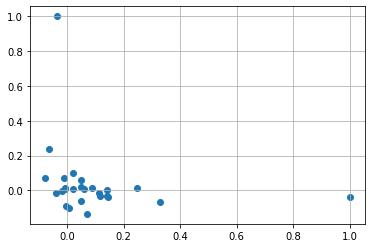

In [ ]:
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,Y) # X et Y sont les variables qu'on a extraite dans le paragraphe précédent
plt.show()

# 1 - Corrélation entre Q3 et les variables indépendantes de notre data_subset

Nous avons crée une nouvelle dataset "*data_subset*" avec les columnes qu'on veut afficher


In [ ]:
data_subset=data[['Q3', 'Q6', 'Q7', 'Q9', 'Q10', 'Q11', 'Q13', 'Q16', 'Q18', 'Q19', 'Q27', 'Q48', 'Q49', 'Q51', 'Q52']]
data_subset 

,Q3,Q6,Q7,Q9,Q10,Q11,Q13,Q16,Q18,Q19,Q27,Q48,Q49,Q51,Q52
0,97,1.0,1.0,2,2,3,4,NaN,NaN,NaN,1,2,3,2,3
1,97,2.0,1.0,5,1,6,2,3.0,2.0,2.0,1,1,3,1,2
2,97,2.0,1.0,5,2,1,5,NaN,NaN,NaN,3,1,3,1,2
3,97,1.0,1.0,1,1,10,6,2.0,2.0,5.0,1,2,3,1,5
4,3,2.0,1.0,5,2,13,5,3.0,3.0,2.0,2,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,1,2.0,1.0,2,1,10,4,2.0,2.0,4.0,2,2,3,1,3
3002,97,1.0,1.0,7,2,96,1,NaN,NaN,NaN,3,2,3,1,2
3003,97,2.0,1.0,3,2,8,5,NaN,NaN,NaN,3,1,4,2,3
3004,97,1.0,1.0,5,1,10,2,2.0,2.0,1.0,2,2,2,1,3


Nettoyage de données


---



Détecter les valeurs manquantes pour chaque columne.

In [ ]:
data_subset.isna().sum()

Q3       0
Q6     187
Q7     187
Q9       0
Q10      0
Q11      0
Q13      0
Q16    713
Q18    713
Q19    713
Q27      0
Q48      0
Q49      0
Q51      0
Q52      0
dtype: int64

In [ ]:
#détecter les valeurs manquantes en Q6
data_subset[data_subset['Q6'].isna()]

,Q3,Q6,Q7,Q9,Q10,Q11,Q13,Q16,Q18,Q19,Q27,Q48,Q49,Q51,Q52
20,1,NaN,NaN,2,2,5,3,NaN,NaN,NaN,2,2,5,1,2
23,1,NaN,NaN,1,2,7,4,1.0,1.0,1.0,2,1,1,2,3
60,1,NaN,NaN,5,1,10,3,2.0,1.0,4.0,2,2,4,1,5
64,5,NaN,NaN,3,2,7,2,3.0,1.0,3.0,2,1,1,2,7
94,1,NaN,NaN,1,2,12,1,4.0,2.0,3.0,1,2,6,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944,2,NaN,NaN,6,9,11,2,4.0,2.0,5.0,3,2,4,1,5
2949,1,NaN,NaN,5,1,10,3,1.0,1.0,1.0,1,2,4,1,5
2973,2,NaN,NaN,2,1,8,4,2.0,2.0,3.0,2,2,4,1,3
2977,1,NaN,NaN,6,2,3,5,NaN,NaN,NaN,1,1,3,1,3


In [ ]:
#Afficher des détails statistiques de base comme le centile, la moyenne, la norme
data_subset.describe()

,Q3,Q6,Q7,Q9,Q10,Q11,Q13,Q16,Q18,Q19,Q27,Q48,Q49,Q51,Q52
count,3006.000000,2819.000000,2819.000000,3006.000000,3006.000000,3006.000000,3006.000000,2293.000000,2293.000000,2293.000000,3006.000000,3006.000000,3006.000000,3006.000000,3006.000000
mean,78.399867,1.798510,1.242284,4.239521,1.962741,16.678975,4.514305,2.346707,2.254688,2.766681,1.673320,1.566866,3.146707,1.119428,3.867598
std,37.649020,0.760438,0.708240,11.194477,1.491610,26.688336,6.327682,0.933048,0.832180,1.215479,0.807865,0.496932,1.013109,0.401381,1.434923
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
25%,97.000000,1.000000,1.000000,1.000000,1.000000,5.000000,4.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000
50%,97.000000,2.000000,1.000000,2.000000,2.000000,9.000000,4.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,1.000000,3.000000
75%,97.000000,2.000000,1.000000,4.000000,2.000000,11.000000,5.000000,3.000000,3.000000,4.000000,2.000000,2.000000,4.000000,1.000000,5.000000
max,99.000000,9.000000,9.000000,99.000000,9.000000,98.000000,99.000000,9.000000,9.000000,9.000000,9.000000,3.000000,9.000000,9.000000,9.000000


In [ ]:
#Décrit comment les octets du bloc de mémoire de taille fixe correspondant à un élément de notre data
data_subset.dtypes

Q3       int64
Q6     float64
Q7     float64
Q9       int64
Q10      int64
Q11      int64
Q13      int64
Q16    float64
Q18    float64
Q19    float64
Q27      int64
Q48      int64
Q49      int64
Q51      int64
Q52      int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea1bc75f50>,
      dtype=object)

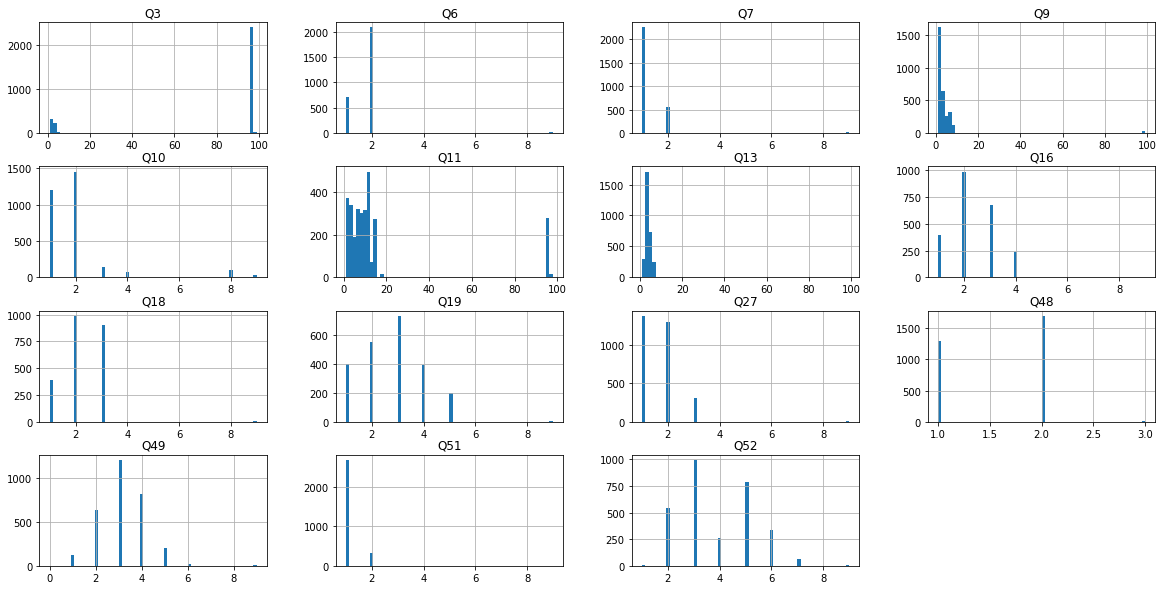

In [ ]:
#Visualiser les Qi
data_subset.hist(bins=60, figsize=(20,10))

In [ ]:
#Exploration de data
d=data_subset[data_subset['Q11']>50]
d

,Q3,Q6,Q7,Q9,Q10,Q11,Q13,Q16,Q18,Q19,Q27,Q48,Q49,Q51,Q52
17,97,2.0,1.0,5,2,96,4,NaN,NaN,NaN,3,1,4,1,2
36,97,2.0,1.0,5,2,96,4,4.0,1.0,2.0,2,2,2,2,6
44,97,1.0,1.0,1,2,96,3,NaN,NaN,NaN,2,2,2,1,2
53,97,2.0,2.0,8,1,96,5,2.0,2.0,3.0,1,2,4,1,5
68,1,2.0,2.0,6,2,96,2,2.0,3.0,2.0,2,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974,97,2.0,1.0,2,2,96,2,NaN,NaN,NaN,2,2,2,1,2
2976,97,2.0,1.0,5,2,96,4,NaN,NaN,NaN,2,2,3,1,3
2988,97,2.0,1.0,3,2,96,7,NaN,NaN,NaN,3,1,3,1,2
2991,97,1.0,1.0,2,2,96,4,3.0,2.0,3.0,2,2,2,1,3


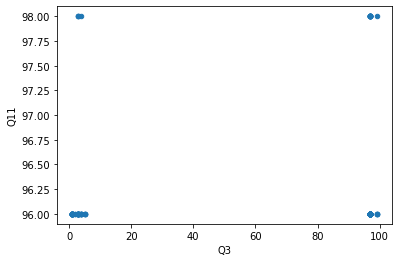

In [ ]:
#Créer un scatterplot pour Q3 et Q11
d[['Q3','Q11']].plot(kind='scatter', x='Q3', y='Q11')

Renvoie une série contenant le nombre de valeurs uniques.

In [ ]:
data_subset['Q3'].value_counts()

97    2392
1      246
3      153
4       86
2       70
5       36
99      23
Name: Q3, dtype: int64

In [ ]:
data_subset['Q6'].value_counts()

2.0    2083
1.0     715
9.0      21
Name: Q6, dtype: int64

In [ ]:
data_subset['Q7'].value_counts()

1.0    2248
2.0     555
9.0      16
Name: Q7, dtype: int64

In [ ]:
data_subset['Q9'].value_counts()

1     970
2     644
3     391
5     262
4     251
6     218
8     121
7     109
99     40
Name: Q9, dtype: int64

In [ ]:
data_subset['Q10'].value_counts()

2    1453
1    1207
3     148
8     104
4      67
9      27
Name: Q10, dtype: int64

In [ ]:
#Détecter les valeurs manquantes de Q7
data_subset[data_subset['Q7'].isna()]

,Q3,Q6,Q7,Q9,Q10,Q11,Q13,Q16,Q18,Q19,Q27,Q48,Q49,Q51,Q52
20,1,NaN,NaN,2,2,5,3,NaN,NaN,NaN,2,2,5,1,2
23,1,NaN,NaN,1,2,7,4,1.0,1.0,1.0,2,1,1,2,3
60,1,NaN,NaN,5,1,10,3,2.0,1.0,4.0,2,2,4,1,5
64,5,NaN,NaN,3,2,7,2,3.0,1.0,3.0,2,1,1,2,7
94,1,NaN,NaN,1,2,12,1,4.0,2.0,3.0,1,2,6,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2944,2,NaN,NaN,6,9,11,2,4.0,2.0,5.0,3,2,4,1,5
2949,1,NaN,NaN,5,1,10,3,1.0,1.0,1.0,1,2,4,1,5
2973,2,NaN,NaN,2,1,8,4,2.0,2.0,3.0,2,2,4,1,3
2977,1,NaN,NaN,6,2,3,5,NaN,NaN,NaN,1,1,3,1,3


In [ ]:
#Supprimer les valeurs manquantes
data_subset.dropna(axis='index', how='all')

,Q3,Q6,Q7,Q9,Q10,Q11,Q13,Q16,Q18,Q19,Q27,Q48,Q49,Q51,Q52
0,97,1.0,1.0,2,2,3,4,NaN,NaN,NaN,1,2,3,2,3
1,97,2.0,1.0,5,1,6,2,3.0,2.0,2.0,1,1,3,1,2
2,97,2.0,1.0,5,2,1,5,NaN,NaN,NaN,3,1,3,1,2
3,97,1.0,1.0,1,1,10,6,2.0,2.0,5.0,1,2,3,1,5
4,3,2.0,1.0,5,2,13,5,3.0,3.0,2.0,2,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,1,2.0,1.0,2,1,10,4,2.0,2.0,4.0,2,2,3,1,3
3002,97,1.0,1.0,7,2,96,1,NaN,NaN,NaN,3,2,3,1,2
3003,97,2.0,1.0,3,2,8,5,NaN,NaN,NaN,3,1,4,2,3
3004,97,1.0,1.0,5,1,10,2,2.0,2.0,1.0,2,2,2,1,3


In [ ]:
#Remplacer les valeurs manquantes
data_subset.replace('Missing', np.nan, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
data_subset.isna()

,Q3,Q6,Q7,Q9,Q10,Q11,Q13,Q16,Q18,Q19,Q27,Q48,Q49,Q51,Q52
0,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3002,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False
3003,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False
3004,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Changer les valeurs nuls
data_subset.replace([np.inf, -np.inf], np.nan)

data_subset.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
data_subset.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

,Q3,Q6,Q7,Q9,Q10,Q11,Q13,Q16,Q18,Q19,Q27,Q48,Q49,Q51,Q52
1,97,2.0,1.0,5,1,6,2,3.0,2.0,2.0,1,1,3,1,2
3,97,1.0,1.0,1,1,10,6,2.0,2.0,5.0,1,2,3,1,5
4,3,2.0,1.0,5,2,13,5,3.0,3.0,2.0,2,1,3,1,3
6,97,2.0,1.0,1,2,11,4,2.0,2.0,4.0,2,1,2,1,5
7,97,2.0,1.0,4,1,11,4,3.0,2.0,1.0,1,1,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,97,1.0,2.0,7,2,4,4,2.0,3.0,2.0,1,2,4,1,2
2999,97,1.0,2.0,2,2,18,4,3.0,2.0,2.0,1,2,3,1,3
3001,1,2.0,1.0,2,1,10,4,2.0,2.0,4.0,2,2,3,1,3
3004,97,1.0,1.0,5,1,10,2,2.0,2.0,1.0,2,2,2,1,3


Test de V-Cramer

In [ ]:
!pip install researchpy
import researchpy as rp


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
ctab, chitest, expected=rp.crosstab(data_subset['Q3'],data_subset['Q6'], margins=False, test="chi-square", expected_freqs=True)
print(ctab)
print(chitest)
print(expected)

     Q6          
Q6  1.0   2.0 9.0
Q3               
1    47    76   0
2    15    18   0
3    43    63   0
4    10    28   1
5     7    10   0
97  424  1403   7
99    3     3   1
                 Chi-square test  results
0  Pearson Chi-square ( 12.0) =   77.0307
1                     p-value =    0.0000
2                  Cramer's V =    0.1336
            Q6                       
Q6         1.0          2.0       9.0
Q3                                   
1    31.276980    91.210283  0.512737
2     8.391385    24.471051  0.137564
3    26.954145    78.603983  0.441871
4     9.917091    28.920333  0.162575
5     4.322835    12.606299  0.070866
97  466.357573  1359.997221  7.645206
99    1.779991     5.190829  0.029180


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


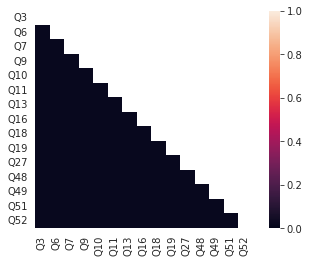

In [ ]:
import seaborn as sns
df = pd.DataFrame( cramers_results,columns = data_subset.columns, index =data_subset.columns)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

Pour savoir s'il y'a une association entre Q3 et Q6

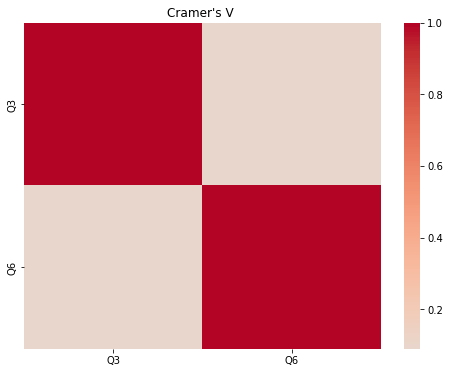

In [ ]:
import numpy as np
import scipy.stats as ss
data3=data_subset[['Q3','Q6']]
DataMatrix = pd.get_dummies(data3)
plt.figure(figsize=(8,6))  # for large datasets
plt.title('Cramer\'s V ')
sns.heatmap(DataMatrix.corr('pearson'), cmap='coolwarm', center=0)

In [ ]:
from scipy.stats import chi2_contingency
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] 
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [ ]:
rows= []

for var1 in data_subset:
  col = []
  for var2 in data_subset :
    cramers =cramers_V(data_subset['Q3'], data_subset['Q6']) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame( cramers_results,columns = data_subset.columns, index =data_subset.columns)



df

,Q3,Q6,Q7,Q9,Q10,Q11,Q13,Q16,Q18,Q19,Q27,Q48,Q49,Q51,Q52
Q3,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
Q6,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
Q7,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
Q9,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
Q10,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
Q11,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
Q13,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
Q16,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
Q18,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02
Q19,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02


In [ ]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import researchpy

In [ ]:
dt=pd.crosstab(data_subset['Q3'],data_subset['Q6'])

dt

Q6,1.0,2.0,9.0
Q3,,,
1,47,76,0
2,15,18,0
3,43,63,0
4,10,28,1
5,7,10,0
97,424,1403,7
99,3,3,1


In [ ]:
crosstab, resultat=researchpy.crosstab(data_subset['Q3'],data_subset['Q6'], test='chi-square')
resultat

,Chi-square test,results
0,Pearson Chi-square ( 12.0) =,77.0307
1,p-value =,0.0000
2,Cramer's V =,0.1336


In [ ]:
#Le résultat de V-Cramer 0.1336
#Pour classer cela nous avons besoin du degré de liberté ( df*= MIN(r,c)-1). => r est le nombre de lignes et c est le nombre de colonnes
#Le minimum des lignes et des colonnes

In [ ]:
dff=min(data_subset.shape[0], data_subset.shape[1]) -1
dff

14

Corrélation entre Q3 et Q6

Text(0.5, 1.0, 'Concrete Q3 vs. Q6')

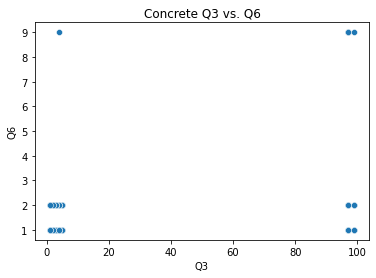

In [ ]:
#Dessiner un scatterplot avec possibilité de plusieurs regroupements sémantiques.
ax = sns.scatterplot(x="Q3", y="Q6" , data=data_subset)
ax.set_title("Concrete Q3 vs. Q6")

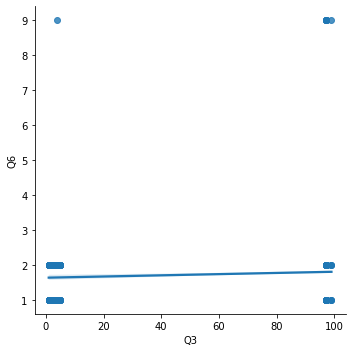

In [ ]:
#Afficher Q3 et Q6
sns.lmplot(x="Q3", y="Q6", data=data_subset)

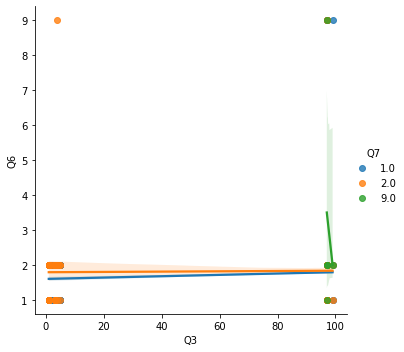

In [ ]:
#Afficher Q3 et Q6 par rapport à Q7
sns.lmplot(x="Q3", y="Q6", hue="Q7", data=data_subset)

In [ ]:
data_subset=data_subset.astype(float)

In [ ]:
#Calculer la corrélation
stats.pearsonr(data_subset['Q3'], data_subset['Q6'])

(0.08945219866417785, 3.150038915523546e-05)

In [ ]:
ab=data_subset[['Q3','Q6']]

In [ ]:
#Matrice de corrélation
cormat = ab.corr()
round(cormat,2)


,Q3,Q6
Q3,1.00,0.09
Q6,0.09,1.00


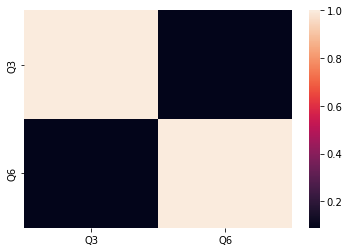

In [ ]:
#Visualiser Q3 et Q6
sns.heatmap(cormat)

Corrélation entre Q3 et Q9

Text(0.5, 1.0, 'Concrete Q3 vs. Q9')

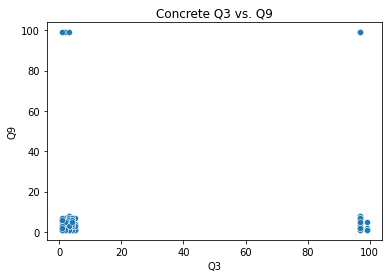

In [ ]:
ax = sns.scatterplot(x="Q3", y="Q9" , data=data_subset)
ax.set_title("Concrete Q3 vs. Q9")

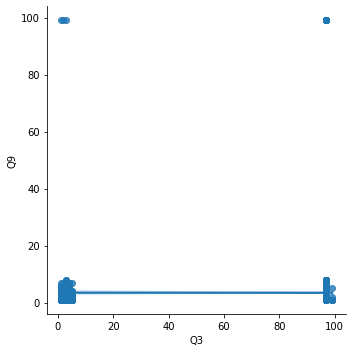

In [ ]:
sns.lmplot(x="Q3", y="Q9", data=data_subset)

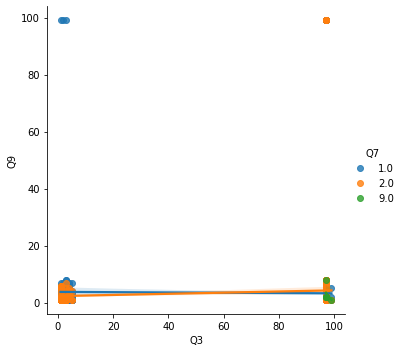

In [ ]:
sns.lmplot(x="Q3", y="Q9", hue="Q7", data=data_subset)

In [ ]:
stats.pearsonr(data_subset['Q3'], data_subset['Q9'])

(-0.0016937804322290427, 0.9373062002636332)

In [ ]:
ab=data_subset[['Q3','Q9']]

In [ ]:
cormat = ab.corr()
round(cormat,2)

,Q3,Q9
Q3,1.0,-0.0
Q9,-0.0,1.0


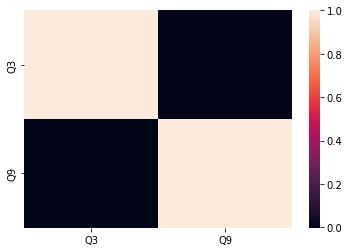

In [ ]:
sns.heatmap(cormat)

Corrélation entre Q3 et Q10

Text(0.5, 1.0, 'Concrete Q3 vs. Q10')

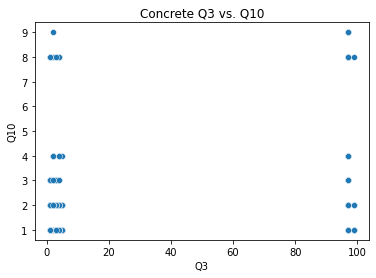

In [ ]:
ax = sns.scatterplot(x="Q3", y="Q10" , data=data_subset)
ax.set_title("Concrete Q3 vs. Q10")

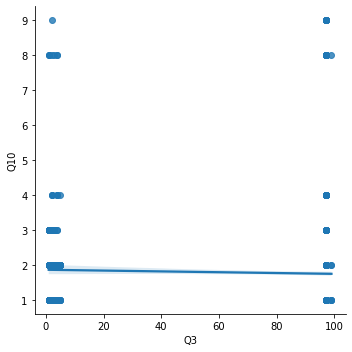

In [ ]:
sns.lmplot(x="Q3", y="Q10", data=data_subset)

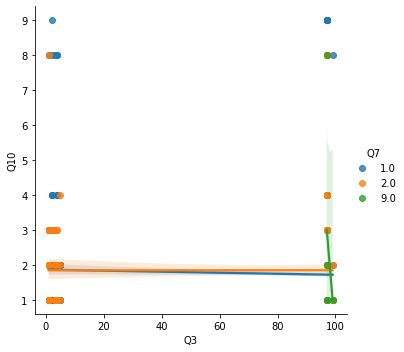

In [ ]:
sns.lmplot(x="Q3", y="Q10", hue="Q7", data=data_subset)

In [ ]:
stats.pearsonr(data_subset['Q3'], data_subset['Q10'])

(-0.03155899482062123, 0.14267393214723126)

In [ ]:
ab=data_subset[['Q3','Q10']]

In [ ]:
cormat = ab.corr()
round(cormat,2)

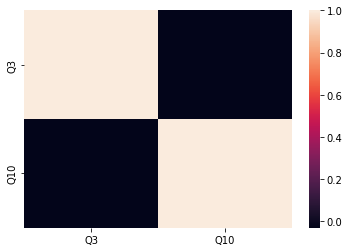

In [ ]:
sns.heatmap(cormat)

Corrélation entre Q3 et Q11

In [ ]:
ax = sns.scatterplot(x="Q3", y="Q11" , data=data_subset)
ax.set_title("Concrete Q3 vs. Q11")

In [ ]:
sns.lmplot(x="Q3", y="Q11", data=data_subset)

In [ ]:
sns.lmplot(x="Q3", y="Q11", hue="Q7", data=data_subset)

In [ ]:
stats.pearsonr(data_subset['Q3'], data_subset['Q11'])

In [ ]:
ab=data_subset[['Q3','Q11']]

In [ ]:
cormat = ab.corr()
round(cormat,2)

In [ ]:
sns.heatmap(cormat)

Corrélation entre Q3 et Q13

In [ ]:
ax = sns.scatterplot(x="Q3", y="Q13" , data=data_subset)
ax.set_title("Concrete Q3 vs. Q13")

In [ ]:
sns.lmplot(x="Q3", y="Q13", data=data_subset)

In [ ]:
sns.lmplot(x="Q3", y="Q13", hue="Q7", data=data_subset)

In [ ]:
stats.pearsonr(data_subset['Q3'], data_subset['Q13'])

In [ ]:
ab=data_subset[['Q3','Q13']]

In [ ]:
cormat = ab.corr()
round(cormat,2)

In [ ]:
sns.heatmap(cormat)

Corrélation entre Q3 et Q16

In [ ]:
ax = sns.scatterplot(x="Q3", y="Q16" , data=data_subset)
ax.set_title("Concrete Q3 vs. Q16")

In [ ]:
sns.lmplot(x="Q3", y="Q16", data=data_subset)

In [ ]:
sns.lmplot(x="Q3", y="Q16", hue="Q7", data=data_subset)

In [ ]:
stats.pearsonr(data_subset['Q3'], data_subset['Q16'])

In [ ]:
ab=data_subset[['Q3','Q16']]

In [ ]:
cormat = ab.corr()
round(cormat,2)

In [ ]:
sns.heatmap(cormat)

Corrélation entre Q3 et Q18

In [ ]:
ax = sns.scatterplot(x="Q3", y="Q18" , data=data_subset)
ax.set_title("Concrete Q3 vs. Q18")

In [ ]:
sns.lmplot(x="Q3", y="Q18", data=data_subset)

In [ ]:
sns.lmplot(x="Q3", y="Q18", hue="Q7", data=data_subset)

In [ ]:
stats.pearsonr(data_subset['Q3'], data_subset['Q18'])

In [ ]:
ab=data_subset[['Q3','Q18']]

In [ ]:
cormat = ab.corr()
round(cormat,2)

In [ ]:
sns.heatmap(cormat)

Corrélation entre Q3 et Q19

In [ ]:
ax = sns.scatterplot(x="Q3", y="Q19" , data=data_subset)
ax.set_title("Concrete Q3 vs. Q19")

In [ ]:
sns.lmplot(x="Q3", y="Q19", data=data_subset)

In [ ]:
sns.lmplot(x="Q3", y="Q19", hue="Q7", data=data_subset)

In [ ]:
stats.pearsonr(data_subset['Q3'], data_subset['Q19'])

In [ ]:
ab=data_subset[['Q3','Q19']]

In [ ]:
cormat = ab.corr()
round(cormat,2)

In [ ]:
sns.heatmap(cormat)

Corrélation entre Q3 et Q27

In [ ]:
ax = sns.scatterplot(x="Q3", y="Q27" , data=data_subset)
ax.set_title("Concrete Q3 vs. Q27")

In [ ]:
sns.lmplot(x="Q3", y="Q27", data=data_subset)

In [ ]:
sns.lmplot(x="Q3", y="Q27", hue="Q7", data=data_subset)

In [ ]:
stats.pearsonr(data_subset['Q3'], data_subset['Q27'])

In [ ]:
ab=data_subset[['Q3','Q27']]

In [ ]:
cormat = ab.corr()
round(cormat,2)

In [ ]:
sns.heatmap(cormat)

Corrélation entre Q3 et Q48

In [ ]:
ax = sns.scatterplot(x="Q3", y="Q48" , data=data_subset)
ax.set_title("Concrete Q3 vs. Q48")

In [ ]:
sns.lmplot(x="Q3", y="Q48", data=data_subset)

In [ ]:
sns.lmplot(x="Q3", y="Q48", hue="Q7", data=data_subset)

In [ ]:
stats.pearsonr(data_subset['Q3'], data_subset['Q48'])

In [ ]:
ab=data_subset[['Q3','Q48']]

In [ ]:
cormat = ab.corr()
round(cormat,2)

In [ ]:
sns.heatmap(cormat)

Corrélation entre Q3 et Q49

In [ ]:
ax = sns.scatterplot(x="Q3", y="Q49" , data=data_subset)
ax.set_title("Concrete Q3 vs. Q49")

In [ ]:
sns.lmplot(x="Q3", y="Q49", data=data_subset)

In [ ]:
sns.lmplot(x="Q3", y="Q49", hue="Q7", data=data_subset)

In [ ]:
stats.pearsonr(data_subset['Q3'], data_subset['Q49'])

In [ ]:
ab=data_subset[['Q3','Q49']]

In [ ]:
cormat = ab.corr()
round(cormat,2)

In [ ]:
sns.heatmap(cormat)

Corrélation entre Q3 et Q51

In [ ]:
ax = sns.scatterplot(x="Q3", y="Q51" , data=data_subset)
ax.set_title("Concrete Q3 vs. Q51")

In [ ]:
sns.lmplot(x="Q3", y="Q51", data=data_subset)

In [ ]:
sns.lmplot(x="Q3", y="Q51", hue="Q7", data=data_subset)

In [ ]:
stats.pearsonr(data_subset['Q3'], data_subset['Q51'])

In [ ]:
ab=data_subset[['Q3','Q51']]

In [ ]:
cormat = ab.corr()
round(cormat,2)

In [ ]:
sns.heatmap(cormat)

Corrélation entre Q3 et Q52

In [ ]:
ax = sns.scatterplot(x="Q3", y="Q52" , data=data_subset)
ax.set_title("Concrete Q3 vs. Q52")

In [ ]:
sns.lmplot(x="Q3", y="Q52", data=data_subset)

In [ ]:
sns.lmplot(x="Q3", y="Q52", hue="Q7", data=data_subset)

In [ ]:
stats.pearsonr(data_subset['Q3'], data_subset['Q52'])

In [ ]:
ab=data_subset[['Q3','Q52']]

In [ ]:
cormat = ab.corr()
round(cormat,2)

In [ ]:
sns.heatmap(cormat)

Résultat final

In [ ]:
cormat = data_subset.corr()
round(cormat,2)

,Q3,Q6,Q7,Q9,Q10,Q11,Q13,Q16,Q18,Q19,Q27,Q48,Q49,Q51,Q52
Q3,1.00,0.09,0.02,-0.00,-0.03,0.03,0.02,-0.03,0.06,0.03,-0.14,0.01,0.00,-0.08,-0.04
Q6,0.09,1.00,0.10,0.01,0.09,0.03,-0.00,-0.04,0.03,0.03,0.00,-0.03,-0.05,0.03,-0.02
Q7,0.02,0.10,1.00,0.02,0.05,0.02,-0.01,0.01,-0.02,-0.01,-0.06,0.13,0.01,-0.03,-0.08
Q9,-0.00,0.01,0.02,1.00,0.16,0.00,-0.01,-0.03,0.08,0.03,0.05,-0.02,-0.01,-0.00,-0.08
Q10,-0.03,0.09,0.05,0.16,1.00,0.08,-0.00,0.01,-0.01,-0.03,0.18,0.01,-0.06,0.03,-0.12
Q11,0.03,0.03,0.02,0.00,0.08,1.00,-0.01,0.01,0.01,0.01,0.05,0.03,-0.02,0.01,-0.04
Q13,0.02,-0.00,-0.01,-0.01,-0.00,-0.01,1.00,0.00,0.02,-0.05,0.02,-0.08,-0.00,0.00,-0.01
Q16,-0.03,-0.04,0.01,-0.03,0.01,0.01,0.00,1.00,-0.29,-0.08,0.10,0.12,-0.15,0.07,0.07
Q18,0.06,0.03,-0.02,0.08,-0.01,0.01,0.02,-0.29,1.00,0.00,-0.08,-0.05,0.10,0.00,-0.07
Q19,0.03,0.03,-0.01,0.03,-0.03,0.01,-0.05,-0.08,0.00,1.00,-0.02,0.04,-0.02,-0.05,-0.03



Regression linéaire multiple de Q3 


---



In [ ]:
dependent_variable = 'Q3'

In [ ]:
independent_variables = data_subset.columns.tolist()

In [ ]:
independent_variables.remove(dependent_variable)

In [ ]:
independent_variables

['Q6',
 'Q7',
 'Q9',
 'Q10',
 'Q11',
 'Q13',
 'Q16',
 'Q18',
 'Q19',
 'Q27',
 'Q48',
 'Q49',
 'Q51',
 'Q52']

In [ ]:
X = data_subset[independent_variables].values

y = data_subset[dependent_variable].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0:10]

array([[0.125     , 0.125     , 0.        , 0.        , 0.10309278,
        0.5       , 0.        , 0.25      , 0.125     , 0.        ,
        1.        , 0.375     , 0.        , 0.5       ],
       [0.        , 0.        , 0.02040816, 0.125     , 0.07216495,
        0.5       , 0.25      , 0.125     , 0.375     , 0.        ,
        0.        , 0.5       , 0.        , 0.375     ],
       [0.125     , 0.125     , 0.05102041, 0.125     , 0.        ,
        0.83333333, 0.125     , 0.25      , 0.375     , 0.125     ,
        1.        , 0.25      , 0.        , 0.25      ],
       [0.        , 0.        , 0.06122449, 0.25      , 0.10309278,
        0.16666667, 0.25      , 0.        , 0.375     , 0.125     ,
        1.        , 0.25      , 0.        , 0.25      ],
       [0.125     , 0.        , 0.        , 0.        , 0.10309278,
        0.33333333, 0.        , 0.25      , 0.        , 0.        ,
        1.        , 0.375     , 0.        , 0.375     ],
       [0.125     , 0.        , 0.0

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred))

34.318245779822455

In [ ]:
r2_score(y_test, y_pred)

-0.04406121234374494

# 2 - Corrélation de Q1 et les variables indépendantes :



Notre nouvelle dataset "*data_subset2*" avec les columnes qu'on veut afficher

In [ ]:
data_subset2=data[['Q1', 'Q7', 'Q9', 'Q10', 'Q11', 'Q13', 'Q27']]
data_subset2

,Q1,Q7,Q9,Q10,Q11,Q13,Q27
0,1,1.0,2,2,3,4,1
1,1,1.0,5,1,6,2,1
2,1,1.0,5,2,1,5,3
3,1,1.0,1,1,10,6,1
4,1,1.0,5,2,13,5,2
...,...,...,...,...,...,...,...
3001,1,1.0,2,1,10,4,2
3002,4,1.0,7,2,96,1,3
3003,4,1.0,3,2,8,5,3
3004,1,1.0,5,1,10,2,2


Nettoyage de données

In [ ]:
data_subset2[data_subset2['Q7'].isna()]

,Q1,Q7,Q9,Q10,Q11,Q13,Q27
20,1,NaN,2,2,5,3,2
23,1,NaN,1,2,7,4,2
60,1,NaN,5,1,10,3,2
64,1,NaN,3,2,7,2,2
94,4,NaN,1,2,12,1,1
...,...,...,...,...,...,...,...
2944,4,NaN,6,9,11,2,3
2949,1,NaN,5,1,10,3,1
2973,1,NaN,2,1,8,4,2
2977,3,NaN,6,2,3,5,1


In [ ]:
data_subset2.replace('Missing', np.nan, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
data_subset2.replace([np.inf, -np.inf], np.nan)
 
data_subset2.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
data_subset2

,Q1,Q7,Q9,Q10,Q11,Q13,Q27
0,1,1.0,2,2,3,4,1
1,1,1.0,5,1,6,2,1
2,1,1.0,5,2,1,5,3
3,1,1.0,1,1,10,6,1
4,1,1.0,5,2,13,5,2
...,...,...,...,...,...,...,...
3001,1,1.0,2,1,10,4,2
3002,4,1.0,7,2,96,1,3
3003,4,1.0,3,2,8,5,3
3004,1,1.0,5,1,10,2,2


Corrélation entre Q1 et Q7

In [ ]:
stats.pearsonr(data_subset2['Q1'], data_subset2['Q7'])

(0.00547128352192423, 0.771535438566034)

In [ ]:
ab=data_subset2[['Q1','Q7']]

In [ ]:
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q1 et Q9

In [ ]:
stats.pearsonr(data_subset2['Q1'], data_subset2['Q9'])

In [ ]:
ab=data_subset2[['Q1','Q9']]

In [ ]:
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q1 et Q10

In [ ]:
stats.pearsonr(data_subset2['Q1'], data_subset2['Q10'])

In [ ]:
ab=data_subset2[['Q1','Q10']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q1 et Q11

In [ ]:
stats.pearsonr(data_subset2['Q1'], data_subset2['Q11'])

In [ ]:
ab=data_subset2[['Q1','Q11']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q1 et Q13

In [ ]:
stats.pearsonr(data_subset2['Q1'], data_subset2['Q13'])

In [ ]:
ab=data_subset2[['Q1','Q13']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q1 et Q27

In [ ]:
stats.pearsonr(data_subset2['Q1'], data_subset2['Q27'])

In [ ]:
ab=data_subset2[['Q1','Q27']]
cormat = ab.corr()
round(cormat,2)

Régression linéaire multiple de Q1


---



In [ ]:
dependent_variable = 'Q1'

In [ ]:
independent_variables = data_subset2.columns.tolist()

In [ ]:
independent_variables.remove(dependent_variable)

In [ ]:
independent_variables

['Q7', 'Q9', 'Q10', 'Q11', 'Q13', 'Q27']

In [ ]:
X = data_subset2[independent_variables].values

y = data_subset2[dependent_variable].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0:10]

array([[0.        , 0.01020408, 0.        , 0.1443299 , 0.03061224,
        0.        ],
       [0.        , 0.03061224, 0.125     , 0.08247423, 0.03061224,
        0.125     ],
       [0.        , 0.05102041, 0.125     , 0.07216495, 0.04081633,
        0.125     ],
       [0.125     , 0.03061224, 0.        , 0.09278351, 0.03061224,
        0.        ],
       [0.125     , 0.        , 0.125     , 0.06185567, 0.03061224,
        0.        ],
       [0.        , 0.01020408, 0.125     , 0.06185567, 0.03061224,
        0.        ],
       [0.        , 0.        , 0.        , 0.1443299 , 0.03061224,
        0.        ],
       [0.        , 0.        , 0.125     , 0.97938144, 0.03061224,
        0.25      ],
       [0.125     , 0.01020408, 0.875     , 0.97938144, 0.03061224,
        0.        ],
       [0.125     , 0.04081633, 0.        , 0.01030928, 0.04081633,
        0.        ]])

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred))

0.6835449448000839

In [ ]:
r2_score(y_test, y_pred)

0.017315276301695604

# 3 - Corrélation entre Q13 et les variables indépendantes :

Notre nouvelle dataset "*data_subset3*" avec les columnes qu'on veut afficher

In [ ]:
data_subset3=data[['Q13', 'Q9', 'Q10', 'Q11', 'Q12', 'Q2', 'Q14', 'Q27']]
data_subset3

,Q13,Q9,Q10,Q11,Q12,Q2,Q14,Q27
0,4,2,2,3,1,2,1,1
1,2,5,1,6,1,2,1,1
2,5,5,2,1,1,3,1,3
3,6,1,1,10,1,4,4,1
4,5,5,2,13,5,2,1,2
...,...,...,...,...,...,...,...,...
3001,4,2,1,10,1,4,3,2
3002,1,7,2,96,7,4,1,3
3003,5,3,2,8,1,2,4,3
3004,2,5,1,10,6,4,1,2


In [ ]:
data_subset3.isna().sum()

Q13    0
Q9     0
Q10    0
Q11    0
Q12    0
Q2     0
Q14    0
Q27    0
dtype: int64

In [ ]:
data_subset3.replace('Missing', np.nan, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
data_subset3.replace([np.inf, -np.inf], np.nan).dropna(axis=1)

,Q13,Q9,Q10,Q11,Q12,Q2,Q14,Q27
0,4,2,2,3,1,2,1,1
1,2,5,1,6,1,2,1,1
2,5,5,2,1,1,3,1,3
3,6,1,1,10,1,4,4,1
4,5,5,2,13,5,2,1,2
...,...,...,...,...,...,...,...,...
3001,4,2,1,10,1,4,3,2
3002,1,7,2,96,7,4,1,3
3003,5,3,2,8,1,2,4,3
3004,2,5,1,10,6,4,1,2


Corrélation entre Q13 et Q9

In [ ]:
stats.pearsonr(data_subset3['Q13'], data_subset3['Q9'])

In [ ]:
ab=data_subset3[['Q13','Q9']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q13 et Q10

In [ ]:
stats.pearsonr(data_subset3['Q13'], data_subset3['Q10'])

In [ ]:
ab=data_subset3[['Q13','Q10']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q13 et Q11

In [ ]:
stats.pearsonr(data_subset3['Q13'], data_subset3['Q11'])

In [ ]:
ab=data_subset3[['Q13','Q11']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q13 et Q12

In [ ]:
stats.pearsonr(data_subset3['Q13'], data_subset3['Q12'])

Corrélation entre Q13 et Q2

In [ ]:
ab=data_subset3[['Q13','Q2']]
cormat = ab.corr()
round(cormat,2)

In [ ]:
stats.pearsonr(data_subset3['Q13'], data_subset3['Q2'])

In [ ]:
ab=data_subset3[['Q13','Q2']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q13 et Q14

In [ ]:
stats.pearsonr(data_subset3['Q13'], data_subset3['Q14'])

In [ ]:
ab=data_subset3[['Q13','Q14']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q13 et Q27


In [ ]:
stats.pearsonr(data_subset3['Q13'], data_subset3['Q27'])

In [ ]:
ab=data_subset3[['Q13','Q27']]
cormat = ab.corr()
round(cormat,2)

Régression linéaire multiple Q13


---



In [ ]:
dependent_variable = 'Q13'

In [ ]:
independent_variables = data_subset3.columns.tolist()

In [ ]:
independent_variables.remove(dependent_variable)

In [ ]:
independent_variables

['Q9', 'Q10', 'Q11', 'Q12', 'Q2', 'Q14', 'Q27']

In [ ]:
X = data_subset3[independent_variables].values

y = data_subset3[dependent_variable].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0:10]

array([[0.06122449, 0.125     , 0.05154639, 0.96938776, 0.        ,
        0.        , 0.125     ],
       [0.02040816, 0.        , 0.1443299 , 0.03061224, 0.125     ,
        0.25      , 0.125     ],
       [0.02040816, 0.125     , 0.06185567, 0.        , 0.        ,
        0.125     , 0.125     ],
       [0.        , 0.125     , 0.03092784, 0.        , 0.125     ,
        0.        , 0.        ],
       [0.04081633, 0.        , 0.12371134, 0.01020408, 0.125     ,
        0.        , 0.25      ],
       [0.        , 0.125     , 0.09278351, 0.        , 0.25      ,
        0.        , 0.125     ],
       [0.02040816, 0.        , 0.1443299 , 0.        , 0.125     ,
        0.375     , 0.125     ],
       [0.01020408, 0.125     , 0.03092784, 0.96938776, 0.375     ,
        0.        , 0.25      ],
       [0.03061224, 0.        , 0.01030928, 0.        , 0.25      ,
        0.        , 0.125     ],
       [0.06122449, 0.125     , 0.06185567, 0.        , 0.125     ,
        0.25      , 0.2

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred))

5.700334806582642

In [ ]:
r2_score(y_test, y_pred)

-0.04945432695571306

# 4 - Corrélation entre Q15 et les variables indépendantes :


Notre nouvelle dataset "*data_subset3*" avec les columnes qu'on veut afficher

In [ ]:
data_subset4=data[['Q1', 'Q2', 'Q7', 'Q9', 'Q11', 'Q13',  'Q14', 'Q15', 'Q16', 'Q18', 'Q19']]
data_subset4

,Q1,Q2,Q7,Q9,Q11,Q13,Q14,Q15,Q16,Q18,Q19
0,1,2,1.0,2,3,4,1,4,NaN,NaN,NaN
1,1,2,1.0,5,6,2,1,1,3.0,2.0,2.0
2,1,3,1.0,5,1,5,1,4,NaN,NaN,NaN
3,1,4,1.0,1,10,6,4,2,2.0,2.0,5.0
4,1,2,1.0,5,13,5,1,1,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
3001,1,4,1.0,2,10,4,3,2,2.0,2.0,4.0
3002,4,4,1.0,7,96,1,1,4,NaN,NaN,NaN
3003,4,2,1.0,3,8,5,4,5,NaN,NaN,NaN
3004,1,4,1.0,5,10,2,1,1,2.0,2.0,1.0


In [ ]:
data_subset4[data_subset4['Q16'].isna()]

,Q1,Q2,Q7,Q9,Q11,Q13,Q14,Q15,Q16,Q18,Q19
0,1,2,1.0,2,3,4,1,4,NaN,NaN,NaN
2,1,3,1.0,5,1,5,1,4,NaN,NaN,NaN
5,1,2,2.0,1,13,4,3,4,NaN,NaN,NaN
9,1,2,1.0,8,5,3,1,4,NaN,NaN,NaN
13,1,3,1.0,8,5,4,1,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2988,4,5,1.0,3,96,7,1,4,NaN,NaN,NaN
2998,1,3,1.0,2,7,4,1,4,NaN,NaN,NaN
3000,1,2,2.0,6,10,4,1,4,NaN,NaN,NaN
3002,4,4,1.0,7,96,1,1,4,NaN,NaN,NaN


In [ ]:
data_subset4.replace('Missing', np.nan, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
data_subset4.replace([np.inf, -np.inf], np.nan)
 
data_subset4.dropna(inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
data_subset4

,Q1,Q2,Q7,Q9,Q11,Q13,Q14,Q15,Q16,Q18,Q19
1,1,2,1.0,5,6,2,1,1,3.0,2.0,2.0
3,1,4,1.0,1,10,6,4,2,2.0,2.0,5.0
4,1,2,1.0,5,13,5,1,1,3.0,3.0,2.0
6,1,2,1.0,1,11,4,1,2,2.0,2.0,4.0
7,1,2,1.0,4,11,4,1,1,3.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2997,1,2,2.0,7,4,4,1,1,2.0,3.0,2.0
2999,1,2,2.0,2,18,4,1,2,3.0,2.0,2.0
3001,1,4,1.0,2,10,4,3,2,2.0,2.0,4.0
3004,1,4,1.0,5,10,2,1,1,2.0,2.0,1.0


Corrélation entre Q15 et Q1

In [ ]:
stats.pearsonr(data_subset4['Q15'], data_subset4['Q1'])

In [ ]:
ab=data_subset4[['Q15','Q1']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q15 et Q2

In [ ]:
stats.pearsonr(data_subset4['Q15'], data_subset4['Q2'])

In [ ]:
ab=data_subset4[['Q15','Q2']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q15 et Q7

In [ ]:
stats.pearsonr(data_subset4['Q15'], data_subset4['Q7'])

In [ ]:
ab=data_subset4[['Q15','Q7']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q15 et Q9

In [ ]:
stats.pearsonr(data_subset4['Q15'], data_subset4['Q9'])

In [ ]:
ab=data_subset4[['Q15','Q9']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q15 et Q11

In [ ]:
stats.pearsonr(data_subset4['Q15'], data_subset4['Q11'])

In [ ]:
ab=data_subset4[['Q15','Q11']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q15 et Q13

In [ ]:
stats.pearsonr(data_subset4['Q15'], data_subset4['Q13'])

In [ ]:
ab=data_subset4[['Q15','Q13']]
cormat = ab.corr()
round(cormat,2)


Corrélation entre Q15 et Q14

In [ ]:
stats.pearsonr(data_subset4['Q15'], data_subset4['Q14'])

In [ ]:
ab=data_subset4[['Q15','Q14']]
cormat = ab.corr()
round(cormat,2)


Corrélation entre Q15 et Q16

In [ ]:
stats.pearsonr(data_subset4['Q15'], data_subset4['Q16'])

In [ ]:
ab=data_subset4[['Q15','Q16']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q15 et Q18

In [ ]:
stats.pearsonr(data_subset4['Q15'], data_subset4['Q18'])

In [ ]:
ab=data_subset4[['Q15','Q18']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q15 et Q19

In [ ]:
stats.pearsonr(data_subset4['Q15'], data_subset4['Q19'])

In [ ]:
ab=data_subset4[['Q15','Q19']]
cormat = ab.corr()
round(cormat,2)

Régression linéaire multiple de Q15

In [ ]:
dependent_variable = 'Q15'

In [ ]:
independent_variables = data_subset4.columns.tolist()

In [ ]:
independent_variables.remove(dependent_variable)

In [ ]:
independent_variables

['Q1', 'Q2', 'Q7', 'Q9', 'Q11', 'Q13', 'Q14', 'Q16', 'Q18', 'Q19']

In [ ]:
X = data_subset4[independent_variables].values

y = data_subset4[dependent_variable].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0:10]

array([[0.        , 0.        , 0.125     , 0.        , 0.10309278,
        0.5       , 0.        , 0.        , 0.25      , 0.125     ],
       [0.        , 0.        , 0.        , 0.02040816, 0.07216495,
        0.5       , 0.125     , 0.25      , 0.125     , 0.375     ],
       [0.33333333, 1.        , 0.125     , 0.05102041, 0.        ,
        0.83333333, 0.125     , 0.125     , 0.25      , 0.375     ],
       [1.        , 0.25      , 0.        , 0.06122449, 0.10309278,
        0.16666667, 0.5       , 0.25      , 0.        , 0.375     ],
       [0.        , 0.        , 0.        , 0.        , 0.10309278,
        0.33333333, 0.        , 0.        , 0.25      , 0.        ],
       [1.        , 0.        , 0.        , 0.05102041, 0.07216495,
        0.5       , 0.5       , 0.        , 0.125     , 0.25      ],
       [0.        , 0.        , 0.        , 0.01020408, 0.97938144,
        0.66666667, 0.125     , 0.25      , 0.25      , 0.125     ],
       [0.        , 1.        , 0.       

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred))

0.6076195337299888

In [ ]:
r2_score(y_test, y_pred)

0.03784477015200027

# 5 - Corrélation entre Q17 et les variables indépendantes : 

Notre nouvelle dataset "*data_subset5*" avec les columnes qu'on veut afficher

In [ ]:
data_subset5=data[['Q1', 'Q2', 'Q7', 'Q8', 'Q9', 'Q11', 'Q12', 'Q17', 'Q18', 'Q19', 'Q24', 'Q48', 'Q49']]
data_subset5

,Q1,Q2,Q7,Q8,Q9,Q11,Q12,Q17,Q18,Q19,Q24,Q48,Q49
0,1,2,1.0,1.0,2,3,1,NaN,NaN,NaN,2,2,3
1,1,2,1.0,1.0,5,6,1,4.0,2.0,2.0,3,1,3
2,1,3,1.0,1.0,5,1,1,NaN,NaN,NaN,4,1,3
3,1,4,1.0,1.0,1,10,1,2.0,2.0,5.0,2,2,3
4,1,2,1.0,1.0,5,13,5,5.0,3.0,2.0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,1,4,1.0,1.0,2,10,1,4.0,2.0,4.0,3,2,3
3002,4,4,1.0,4.0,7,96,7,NaN,NaN,NaN,3,2,3
3003,4,2,1.0,4.0,3,8,1,NaN,NaN,NaN,2,1,4
3004,1,4,1.0,1.0,5,10,6,5.0,2.0,1.0,2,2,2


In [ ]:
data_subset5[data_subset5['Q17'].isna()]

,Q1,Q2,Q7,Q8,Q9,Q11,Q12,Q17,Q18,Q19,Q24,Q48,Q49
0,1,2,1.0,1.0,2,3,1,NaN,NaN,NaN,2,2,3
2,1,3,1.0,1.0,5,1,1,NaN,NaN,NaN,4,1,3
5,1,2,2.0,NaN,1,13,1,NaN,NaN,NaN,1,1,4
9,1,2,1.0,1.0,8,5,5,NaN,NaN,NaN,2,2,1
13,1,3,1.0,6.0,8,5,1,NaN,NaN,NaN,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2988,4,5,1.0,4.0,3,96,7,NaN,NaN,NaN,1,1,3
2998,1,3,1.0,5.0,2,7,1,NaN,NaN,NaN,2,2,3
3000,1,2,2.0,NaN,6,10,1,NaN,NaN,NaN,2,2,3
3002,4,4,1.0,4.0,7,96,7,NaN,NaN,NaN,3,2,3


In [ ]:
data_subset5.replace('Missing', np.nan, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
data_subset5.replace([np.inf, -np.inf], np.nan)
 
data_subset5.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
data_subset5

,Q1,Q2,Q7,Q8,Q9,Q11,Q12,Q17,Q18,Q19,Q24,Q48,Q49
1,1,2,1.0,1.0,5,6,1,4.0,2.0,2.0,3,1,3
3,1,4,1.0,1.0,1,10,1,2.0,2.0,5.0,2,2,3
4,1,2,1.0,1.0,5,13,5,5.0,3.0,2.0,2,1,3
6,1,2,1.0,9.0,1,11,1,4.0,2.0,4.0,2,1,2
7,1,2,1.0,1.0,4,11,1,4.0,2.0,1.0,3,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,1,2,1.0,1.0,4,8,1,2.0,2.0,3.0,3,2,3
2995,1,3,1.0,1.0,1,10,1,4.0,2.0,4.0,2,2,3
2996,1,3,1.0,5.0,1,11,1,4.0,2.0,4.0,2,2,2
3001,1,4,1.0,1.0,2,10,1,4.0,2.0,4.0,3,2,3


Corrélation entre Q17 et Q1

In [ ]:
stats.pearsonr(data_subset5['Q17'], data_subset5['Q1'])

(-0.005538397651506024, 0.8169077222607527)

In [ ]:
ab=data_subset5[['Q17','Q1']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q17 et Q2

In [ ]:
stats.pearsonr(data_subset5['Q17'], data_subset5['Q2'])

In [ ]:
ab=data_subset5[['Q17','Q2']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q17 et Q7

In [ ]:
stats.pearsonr(data_subset5['Q17'], data_subset5['Q7'])

In [ ]:
ab=data_subset5[['Q17','Q7']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q17 et Q8

In [ ]:
stats.pearsonr(data_subset5['Q17'], data_subset5['Q8'])

In [ ]:
ab=data_subset5[['Q17','Q8']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q17 et Q9

In [ ]:
stats.pearsonr(data_subset5['Q17'], data_subset5['Q9'])

In [ ]:
ab=data_subset5[['Q17','Q9']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q17 et Q11

In [ ]:
stats.pearsonr(data_subset5['Q17'], data_subset5['Q11'])

In [ ]:
ab=data_subset5[['Q17','Q11']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q17 et Q12

In [ ]:
stats.pearsonr(data_subset5['Q17'], data_subset5['Q12'])

In [ ]:
ab=data_subset5[['Q17','Q12']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q17 et Q18

In [ ]:
stats.pearsonr(data_subset5['Q17'], data_subset5['Q18'])

In [ ]:
ab=data_subset5[['Q17','Q18']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q17 et Q19

In [ ]:
stats.pearsonr(data_subset5['Q17'], data_subset5['Q19'])

In [ ]:
ab=data_subset5[['Q17','Q19']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q17 et Q24

In [ ]:
stats.pearsonr(data_subset5['Q17'], data_subset5['Q24'])

In [ ]:
ab=data_subset5[['Q17','Q24']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q17 et Q48

In [ ]:
stats.pearsonr(data_subset5['Q17'], data_subset5['Q48'])

In [ ]:
ab=data_subset5[['Q17','Q48']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q17 et Q49

In [ ]:
stats.pearsonr(data_subset5['Q17'], data_subset5['Q49'])

In [ ]:
ab=data_subset5[['Q17','Q49']]
cormat = ab.corr()
round(cormat,2)

Regression linéaire multiple de Q17 

In [ ]:
dependent_variable = 'Q17'

In [ ]:
independent_variables = data_subset5.columns.tolist()

In [ ]:
independent_variables.remove(dependent_variable)

In [ ]:
independent_variables

['Q1', 'Q2', 'Q7', 'Q8', 'Q9', 'Q11', 'Q12', 'Q18', 'Q19', 'Q24', 'Q48', 'Q49']

In [ ]:
X = data_subset5[independent_variables].values

y = data_subset5[dependent_variable].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0:10]

array([[0.        , 0.25      , 0.        , 0.        , 0.02040816,
        0.11340206, 0.        , 0.125     , 0.        , 0.25      ,
        0.        , 0.33333333],
       [1.        , 0.        , 0.        , 0.        , 0.        ,
        0.07216495, 0.        , 0.25      , 0.        , 0.25      ,
        0.        , 0.55555556],
       [0.        , 0.5       , 0.        , 0.        , 0.        ,
        0.09278351, 0.96938776, 0.        , 0.        , 0.125     ,
        0.        , 0.33333333],
       [0.33333333, 0.5       , 0.        , 0.        , 0.        ,
        0.10309278, 0.02040816, 0.25      , 0.        , 0.125     ,
        1.        , 0.22222222],
       [0.        , 0.        , 0.        , 0.        , 0.01020408,
        0.10309278, 0.01020408, 0.25      , 0.25      , 0.25      ,
        1.        , 0.11111111],
       [0.        , 0.5       , 0.        , 0.        , 0.01020408,
        0.1443299 , 0.        , 0.25      , 0.25      , 0.375     ,
        0.        ,

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred))

1.2735082028241735

In [ ]:
r2_score(y_test, y_pred)

0.05088124163542673

# 6 - Corrélation entre Q53 et les variables indépendantes

Notre nouvelle dataset "*data_subset6*" avec les columnes qu'on veut afficher

In [ ]:
data_subset6=data[['Q1', 'Q2', 'Q7',  'Q9',  'Q11', 'Q13', 'Q14', 'Q16', 'Q18', 'Q19', 'Q27', 'Q48', 'Q49', 'Q51', 'Q53']]
data_subset6

,Q1,Q2,Q7,Q9,Q11,Q13,Q14,Q16,Q18,Q19,Q27,Q48,Q49,Q51,Q53
0,1,2,1.0,2,3,4,1,NaN,NaN,NaN,1,2,3,2,6
1,1,2,1.0,5,6,2,1,3.0,2.0,2.0,1,1,3,1,5
2,1,3,1.0,5,1,5,1,NaN,NaN,NaN,3,1,3,1,6
3,1,4,1.0,1,10,6,4,2.0,2.0,5.0,1,2,3,1,6
4,1,2,1.0,5,13,5,1,3.0,3.0,2.0,2,1,3,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,1,4,1.0,2,10,4,3,2.0,2.0,4.0,2,2,3,1,6
3002,4,4,1.0,7,96,1,1,NaN,NaN,NaN,3,2,3,1,1
3003,4,2,1.0,3,8,5,4,NaN,NaN,NaN,3,1,4,2,6
3004,1,4,1.0,5,10,2,1,2.0,2.0,1.0,2,2,2,1,5


In [ ]:
data_subset6[data_subset6['Q16'].isna()]

,Q1,Q2,Q7,Q9,Q11,Q13,Q14,Q16,Q18,Q19,Q27,Q48,Q49,Q51,Q53


In [ ]:
data_subset6.replace('Missing', np.nan, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
data_subset6.replace([np.inf, -np.inf], np.nan)
 
data_subset6.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
data_subset6

,Q1,Q2,Q7,Q9,Q11,Q13,Q14,Q16,Q18,Q19,Q27,Q48,Q49,Q51,Q53
1,1,2,1.0,5,6,2,1,3.0,2.0,2.0,1,1,3,1,5
3,1,4,1.0,1,10,6,4,2.0,2.0,5.0,1,2,3,1,6
4,1,2,1.0,5,13,5,1,3.0,3.0,2.0,2,1,3,1,6
6,1,2,1.0,1,11,4,1,2.0,2.0,4.0,2,1,2,1,6
7,1,2,1.0,4,11,4,1,3.0,2.0,1.0,1,1,3,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2997,1,2,2.0,7,4,4,1,2.0,3.0,2.0,1,2,4,1,2
2999,1,2,2.0,2,18,4,1,3.0,2.0,2.0,1,2,3,1,3
3001,1,4,1.0,2,10,4,3,2.0,2.0,4.0,2,2,3,1,6
3004,1,4,1.0,5,10,2,1,2.0,2.0,1.0,2,2,2,1,5


Corrélation entre Q53 et Q1

In [ ]:
stats.pearsonr(data_subset6['Q53'], data_subset6['Q1'])

In [ ]:
ab=data_subset6[['Q53','Q1']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q53 et Q2

In [ ]:
stats.pearsonr(data_subset6['Q53'], data_subset6['Q2'])

In [ ]:
ab=data_subset6[['Q53','Q2']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q53 et Q7

In [ ]:
stats.pearsonr(data_subset6['Q53'], data_subset6['Q7'])

In [ ]:
ab=data_subset6[['Q53','Q7']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q53 et Q9

In [ ]:
stats.pearsonr(data_subset6['Q53'], data_subset6['Q9'])

In [ ]:
ab=data_subset6[['Q53','Q9']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q53 et Q11

In [ ]:
stats.pearsonr(data_subset6['Q53'], data_subset6['Q11'])

In [ ]:
ab=data_subset6[['Q53','Q11']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q53 et Q13

In [ ]:
stats.pearsonr(data_subset6['Q53'], data_subset6['Q13'])

In [ ]:
ab=data_subset6[['Q53','Q13']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q53 et Q14

In [ ]:
stats.pearsonr(data_subset6['Q53'], data_subset6['Q14'])

In [ ]:
ab=data_subset6[['Q53','Q14']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q53 et Q16

In [ ]:
stats.pearsonr(data_subset6['Q53'], data_subset6['Q16'])

In [ ]:
ab=data_subset6[['Q53','Q16']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q53 et Q18

In [ ]:
stats.pearsonr(data_subset6['Q53'], data_subset6['Q18'])

In [ ]:
ab=data_subset6[['Q53','Q18']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q53 et Q19

In [ ]:
stats.pearsonr(data_subset6['Q53'], data_subset6['Q19'])

In [ ]:
ab=data_subset6[['Q53','Q19']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q53 et Q27

In [ ]:
stats.pearsonr(data_subset6['Q53'], data_subset6['Q27'])

In [ ]:
ab=data_subset6[['Q53','Q27']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q53 et Q48

In [ ]:
stats.pearsonr(data_subset6['Q53'], data_subset6['Q48'])

In [ ]:
ab=data_subset6[['Q53','Q48']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q53 et Q49

In [ ]:
stats.pearsonr(data_subset6['Q53'], data_subset6['Q49'])

In [ ]:
ab=data_subset6[['Q53','Q49']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q53 et Q51

In [ ]:
stats.pearsonr(data_subset6['Q53'], data_subset6['Q51'])

In [ ]:
ab=data_subset6[['Q53','Q51']]
cormat = ab.corr()
round(cormat,2)

Corrélation entre Q53 et Q52

In [ ]:
stats.pearsonr(data_subset6['Q53'], data_subset6['Q51'])

In [ ]:
ab=data_subset6[['Q53','Q51']]
cormat = ab.corr()
round(cormat,2)

Régression linéaire multiple de Q53 


---



In [ ]:
dependent_variable = 'Q53'

In [ ]:
independent_variables = data_subset6.columns.tolist()

In [ ]:
independent_variables.remove(dependent_variable)

In [ ]:
independent_variables

['Q1',
 'Q2',
 'Q7',
 'Q9',
 'Q11',
 'Q13',
 'Q14',
 'Q16',
 'Q18',
 'Q19',
 'Q27',
 'Q48',
 'Q49',
 'Q51']

In [ ]:
X = data_subset6[independent_variables].values
 
y = data_subset6[dependent_variable].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train[0:10]

array([[0.        , 0.        , 0.125     , 0.        , 0.10309278,
        0.5       , 0.        , 0.        , 0.25      , 0.125     ,
        0.        , 1.        , 0.375     , 0.        ],
       [0.        , 0.        , 0.        , 0.02040816, 0.07216495,
        0.5       , 0.125     , 0.25      , 0.125     , 0.375     ,
        0.        , 0.        , 0.5       , 0.        ],
       [0.33333333, 1.        , 0.125     , 0.05102041, 0.        ,
        0.83333333, 0.125     , 0.125     , 0.25      , 0.375     ,
        0.125     , 1.        , 0.25      , 0.        ],
       [1.        , 0.25      , 0.        , 0.06122449, 0.10309278,
        0.16666667, 0.5       , 0.25      , 0.        , 0.375     ,
        0.125     , 1.        , 0.25      , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.10309278,
        0.33333333, 0.        , 0.        , 0.25      , 0.        ,
        0.        , 1.        , 0.375     , 0.        ],
       [1.        , 0.        , 0. 

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred))

1.6811338071851583

In [ ]:
r2_score(y_test, y_pred)

-0.06984034472650724